# Cамоподобие Херста

In [1]:
import math
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

%matplotlib inline

In [9]:
class HistResult:
    # Матрица с результатами, в виде списка таплов: (mi, ln_mi, variance, ln_variance)
    matrix = []
    
    # коэффициет b
    slope = 0
    
    # свободный коэффициет k
    intercept = 0
    
    # коэффициент корелляции
    correlation_coefficient = 0
    
    # коэффициент Харста
    hirst_coefficient = 0
    
    def __init__(self, matrix, slope, intercept, correlation_coefficient, hirst_coefficient):
        self.matrix = matrix
        self.slope = slope
        self.intercept = intercept
        self.correlation_coefficient = correlation_coefficient
        self.hirst_coefficient = hirst_coefficient
        
    def print_result(self): 
        print("---")
        for mi, ln_mi, variance, ln_variance in self.matrix:
            print("mi: 1/%s, variance: %s, ln(variance): %s, ln(m): %s)" % (mi, variance, ln_variance, ln_mi))
        
        print("---")
        print("y = %s * x + %s" %(self.slope, self.intercept))
        print("Correlation coefficient = %s" % self.correlation_coefficient)
        print("Hirst Coefficient = %s" % self.hirst_coefficient)
            
    def plot(self, height = 5, width = 10, font_size = 12):
        plt.rcParams['figure.figsize'] = (width, height)
        plt.rcParams['font.size'] = font_size
        
        fig, ax = plt.subplots()
        
        x = [x[1] for x in self.matrix]
        y = [y[3] for y in self.matrix]
        
        x1 = []
        y1 = []

        for xx in np.arange(min(x) - 0.1, max(x) + 0.1, 0.1):
            x1.append(xx)
            y1.append(self.slope * xx + self.intercept)
        
        ax.scatter(x, y)
        ax.plot(x1, y1)
        
        fig.show()

class SelfSimilarityHirst:
    """
        Самоподобие Херста
    """
    
    def __blocks_split(self, arr, size):
        """
            Делит входной массив на блоки указанного размера,
            например arr = [1, 2, 3, 4, 5], size = 2,
            результат: [[1, 2], [3, 4]]
            отбрасывает элементы для которых не хватает блоков
        """
        blocks = []
        pos = 0
        for i in range(size, len(arr) + 1, size):
            blocks.append(arr[pos:i])
            pos = pos + size
        return blocks

    def __expected_value(self, arr):
        """
            Математическое ожидание (среднее)
        """
        return sum(arr) / len(arr)

    def __variance(self, arr, exp):
        """
            Дисперсия
        """
        d = [math.pow(x - exp, 2) for x in arr]
        return sum(d) / len(d)
    
    def __block_count(self, data_len):
        """
            Рассчитывает количество блоков
        """
        return int(data_len / 2)
    
    def __variance_matrix(self, data, log_base):
        """
            Рассчитывает зависимость логарифма среднего значения дисперсии от логарифма mi
        """
        result = []
        
        last_cnt = -1
        
        block_count = self.__block_count(len(data))
        
        for mi in range(block_count, 0, -1):
            block_cnt = int(len(data)/mi)
            
            # Если уже были блоки такого размера, то пропускаем
            if block_cnt == last_cnt:
                continue
            last_cnt = block_cnt
            
            dds = []
            
            # Рассчет среднего и дисперсии для каждого блока
            for block in self.__blocks_split(data, block_cnt):
                vals = [y for x, y in block]
                ev = self.__expected_value(vals)
                v = self.__variance(vals, ev)
                dds.append(v)
               
            # Рассчет среднего значения дисперсий блока
            variance = self.__expected_value(dds)
            
            ln_mi = math.log(1/mi, log_base)
            ln_variance = math.log(variance, log_base)
            
            result.append((mi, ln_mi, variance, ln_variance))
            
        return result
    
    def __regress(self, x, y):
        slope, intercept, correlation_coefficient, p_value, std_err = stats.linregress(x,y)
        h = (2 - slope) / 2
        
        return (slope, intercept, correlation_coefficient, h)
    
    def compute(self, data, log_base = math.e):
        matrix = self.__variance_matrix(data, log_base)
        
        x = [x[1] for x in matrix]
        y = [y[3] for y in matrix]
        
        slope, intercept, correlation_coefficient, h = self.__regress(x, y)
        
        return HistResult(matrix, slope, intercept, correlation_coefficient, h)

## Тест по трудовому праву 

In [3]:
data_right = [
    (19, 1),
    (20, 0),
    (21, 2),
    (22, 0),
    (23, 2),
    (24, 0),
    (25, 1),
    (26, 2),
    (27, 1),
    (28, 1),
    (29, 3),
    (30, 5),
    (31, 5),
    (32, 2),
    (33, 3),
    (34, 6),
    (35, 5),
    (36, 5),
    (37, 2),
    (38, 8),
    (39, 4),
    (40, 4),
    (41, 10),
    (42, 12),
    (43, 8),
    (44, 7),
    (45, 7),
    (46, 8),
    (47, 2),
    (48, 6),
    (49, 2),
    (50, 1),
    (51, 4),
    (52, 2),
    (53, 1),
    (54, 1)
]

---
mi: 1/18, variance: 1.3194444444444444, ln(variance): 0.12039110885757928, ln(m): -1.255272505103306)
mi: 1/12, variance: 2.685185185185185, ln(variance): 0.4289742424120063, ln(m): -1.0791812460476247)
mi: 1/9, variance: 3.2569444444444446, ln(variance): 0.5128103506198336, ln(m): -0.9542425094393249)
mi: 1/7, variance: 3.177142857142857, ln(variance): 0.5020367428957629, ln(m): -0.8450980400142568)
mi: 1/6, variance: 3.8472222222222228, ln(variance): 0.58514727263318, ln(m): -0.7781512503836435)
mi: 1/5, variance: 2.9551020408163264, ln(variance): 0.4705724818326144, ln(m): -0.6989700043360187)
mi: 1/4, variance: 4.382716049382716, ln(variance): 0.6417433341764442, ln(m): -0.6020599913279623)
mi: 1/3, variance: 6.1365740740740735, ln(variance): 0.7879259809181812, ln(m): -0.47712125471966244)
mi: 1/2, variance: 7.316358024691356, ln(variance): 0.8642949494483632, ln(m): -0.30102999566398114)
mi: 1/1, variance: 8.87885802469136, ln(variance): 0.9483571115592581, ln(m): 0.0)
---
y 

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


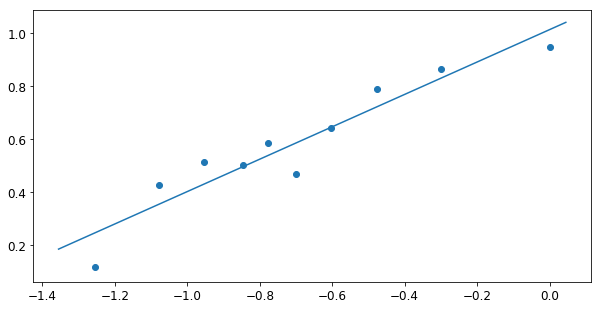

In [10]:
hist = SelfSimilarityHirst()
res = hist.compute(data_right, log_base=10)
res.print_result()
res.plot()

## Тест по уголовному праву 

In [5]:
data_wa = [
    (0, 5),
    (1, 1),
    (2, 0),
    (3, 3),
    (4, 0),
    (5, 2),
    (6, 1),
    (7, 1),
    (8, 1),
    (9, 0),
    (10, 0),
    (11, 1),
    (12, 0),
    (13, 4),
    (14, 0),
    (15, 2),
    (16, 1),
    (17, 1),
    (18, 3),
    (19, 1),
    (20, 3),
    (21, 1),
    (22, 2),
    (23, 2),
    (24, 1),
    (25, 3),
    (26, 4),
    (27, 4),
    (28, 1),
    (29, 1),
    (30, 1),
    (31, 0),
    (32, 3),
    (33, 3),
    (34, 3),
    (35, 2),
    (36, 3),
    (37, 1),
    (38, 2),
    (39, 1),
    (40, 3),
    (41, 0),
    (42, 2),
    (43, 2),
    (44, 5),
    (45, 3),
    (46, 2),
    (47, 5),
    (48, 5),
    (49, 1),
    (50, 2),
    (51, 2),
    (52, 3),
    (53, 3),
    (54, 3),
    (55, 1),
    (56, 1),
    (57, 4),
    (58, 5),
    (59, 2),
    (60, 2),
    (61, 2),
    (62, 1),
    (63, 0),
    (64, 3),
    (65, 1)
]

---
mi: 1/33, variance: 1.0227272727272727, ln(variance): 0.022472855852058576, ln(m): -3.4965075614664802)
mi: 1/22, variance: 1.3535353535353536, ln(variance): 0.3027199498163215, ln(m): -3.0910424533583156)
mi: 1/16, variance: 1.25390625, ln(variance): 0.22626367865045338, ln(m): -2.772588722239781)
mi: 1/13, variance: 1.606153846153846, ln(variance): 0.4738424055529012, ln(m): -2.5649493574615367)
mi: 1/11, variance: 1.532828282828283, ln(variance): 0.4271145798050179, ln(m): -2.3978952727983707)
mi: 1/9, variance: 1.5555555555555558, ln(variance): 0.4418327522790394, ln(m): -2.1972245773362196)
mi: 1/8, variance: 1.751953125, ln(variance): 0.5607312370192883, ln(m): -2.0794415416798357)
mi: 1/7, variance: 1.6754850088183422, ln(variance): 0.5161026808668344, ln(m): -1.9459101490553135)
mi: 1/6, variance: 1.6639118457300277, ln(variance): 0.5091713636699643, ln(m): -1.791759469228055)
mi: 1/5, variance: 1.770414201183432, ln(variance): 0.5712135311772488, ln(m): -1.6094379124341003

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


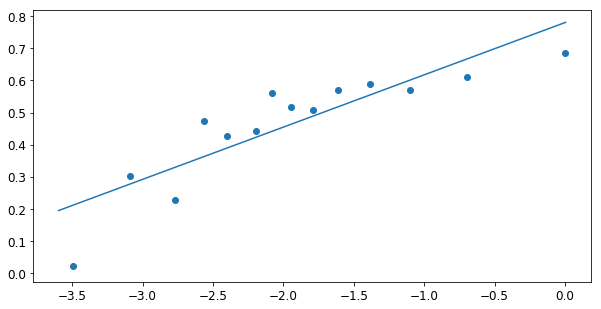

In [11]:
hist = SelfSimilarityHirst()
res = hist.compute(data_wa)
res.print_result()
res.plot()